In [1]:
import cv2
import math
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from google.colab import drive
import os
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
print(tf.__version__)
drive.mount('/content/gdrive')

2.6.0
Mounted at /content/gdrive


In [3]:
files=os.listdir("Humans")
!ls
img_arr=[]
categories = []
for file in files:
    category = file.split('_')[0]
    if category == 'human':
        categories.append(str(1))
    else:
        categories.append(str(0))
    img=cv2.imread('Humans/'+file)
    img = cv2.resize(img, (240,320), interpolation = cv2.INTER_AREA)
    img_arr.append(img)

gdrive	Humans	sample_data


In [4]:
def plot_cnn_images(image_set, orig, pred=None):
    assert len(image_set) == len(orig) == 9
    
    # Creating figure with 4x4 sub-plots.
    fig, axes = plt.subplots(3, 3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(image_set[i], cmap='binary')

        # Show true and predicted classes.
        if pred is None:
            xlabel = "Label: {0}".format(orig[i])
        else:
            xlabel = "Label: {0}, Pred: {1}".format(orig[i], pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

#print(categories)
#print(img_arr)

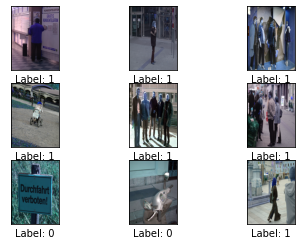

In [72]:
train_imgs, test_set, train_labels, test_labels = train_test_split(img_arr, categories, test_size = .2, random_state = 42)

label_bin = LabelBinarizer().fit(train_labels)
y_train = label_bin.transform(train_labels)
y_test = label_bin.transform(test_labels)
plot_cnn_images(train_imgs[9:18], train_labels[9:18])

img_shape_full = train_imgs[0].shape
img_size = img_shape_full[0]
img_size_flat = len(train_imgs[0].ravel())
img_shape = img_shape_full[:2]
num_classes = 2
num_channels = img_shape_full[-1]


In [91]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=img_shape_full),
    # keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=16,kernel_size=2, activation="relu", padding="same", name='layer1_conv1'),
    keras.layers.Conv2D(filters=16,kernel_size=3, activation="relu", padding="same", name='layer1_conv2'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32,kernel_size=2, activation="relu", padding="same", name='layer2_conv1'),
    keras.layers.Conv2D(filters=32,kernel_size=3, activation="relu", padding="same", name='layer2_conv2'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    #keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64,kernel_size=2, activation="relu", padding="same", name='layer3_conv1'),
    keras.layers.Conv2D(filters=64,kernel_size=3, activation="relu", padding="same", name='layer3_conv2'),
    keras.layers.Conv2D(filters=256,kernel_size=3, activation="relu", padding="same", name='layer3_conv3'),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    #keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')  
  ])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_conv1 (Conv2D)        (None, 320, 240, 16)      208       
_________________________________________________________________
layer1_conv2 (Conv2D)        (None, 320, 240, 16)      2320      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 160, 120, 16)      0         
_________________________________________________________________
layer2_conv1 (Conv2D)        (None, 160, 120, 32)      2080      
_________________________________________________________________
layer2_conv2 (Conv2D)        (None, 160, 120, 32)      9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 80, 60, 32)        0         
_________________________________________________________________
layer3_conv1 (Conv2D)        (None, 80, 60, 64)      

In [92]:
optimizer = tf.keras.optimizers.Adam(lr=1e-5)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [93]:
history = model.fit(x=np.array(train_imgs), 
        y=y_train,
        epochs=15, batch_size=50)

Epoch 1/15
12/12 [==============================] - 2s 103ms/step - loss: 2.5722 - accuracy: 0.5702
Epoch 2/15
12/12 [==============================] - 1s 103ms/step - loss: 0.8818 - accuracy: 0.5805
Epoch 3/15
12/12 [==============================] - 1s 102ms/step - loss: 0.6705 - accuracy: 0.5993
Epoch 4/15
12/12 [==============================] - 1s 103ms/step - loss: 0.5997 - accuracy: 0.6781
Epoch 5/15
12/12 [==============================] - 1s 102ms/step - loss: 0.5489 - accuracy: 0.7260
Epoch 6/15
12/12 [==============================] - 1s 103ms/step - loss: 0.5315 - accuracy: 0.7466
Epoch 7/15
12/12 [==============================] - 1s 103ms/step - loss: 0.4822 - accuracy: 0.7791
Epoch 8/15
12/12 [==============================] - 1s 103ms/step - loss: 0.4635 - accuracy: 0.7945
Epoch 9/15
12/12 [==============================] - 1s 103ms/step - loss: 0.4421 - accuracy: 0.7911
Epoch 10/15
12/12 [==============================] - 1s 103ms/step - loss: 0.4287 - accuracy: 0.8253

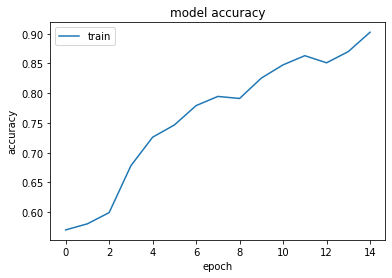

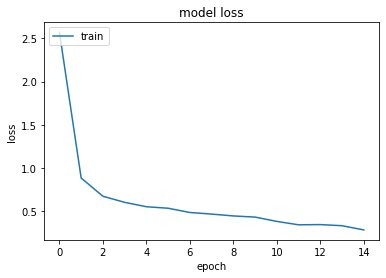

In [94]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [99]:
def plot_test_predict(image_set,pred,test_orig):
     plot_cnn_images(images=image_set[-16:],
                 test_orig=test_orig[-16:],
                 pred=pred[-16:])

loss,accuracy = model.evaluate(x=np.array(test_set), y=y_test)
loss1,accuracy1 = model.evaluate(x=np.array(train_imgs), y=y_train)
print('Testing Accuracy:',accuracy,'\n','Training Accuracy:',accuracy1)
pred = model.predict(np.array(test_set))
test_pred = np.where(np.array(pred) >= 0.5,1,0).tolist()
pred1 = model.predict(np.array(train_imgs))
train_pred = np.where(pred1 >= 0.5,1, 0).tolist()
integer_map = map(int, test_labels)
integer_map1 = map(int, train_labels)
integer_list = list(integer_map)
integer_list1 = list(integer_map1)
#print(test_pred,np.array(integer_list),train_pred,np.array(integer_list1))

#plot_test_predict(test_set,pred,np.array(integer_list))

19/19 [==============================] - 0s 18ms/step - loss: 0.2477 - accuracy: 0.9332
Testing Accuracy: 0.7945205569267273 
 Training Accuracy: 0.9332191944122314
